In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Loading the dataset

In [69]:
# read spambase data file into a dataframe
# Define the column names
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'spam'
]

df = pd.read_csv("data/spambase.data", header=None, names=column_names)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [70]:
# rename the target column
df.rename(columns={57:'spam'}, inplace=True)
display(df.head())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Exploratory Data Analysis

In [71]:
# checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [72]:
# checking the stats of each column
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [73]:
# print dataset shape
print(f"The Dataset consists of {df.shape[1]} features & {df.shape[0]} samples.")

The Dataset consists of 58 features & 4601 samples.


In [74]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

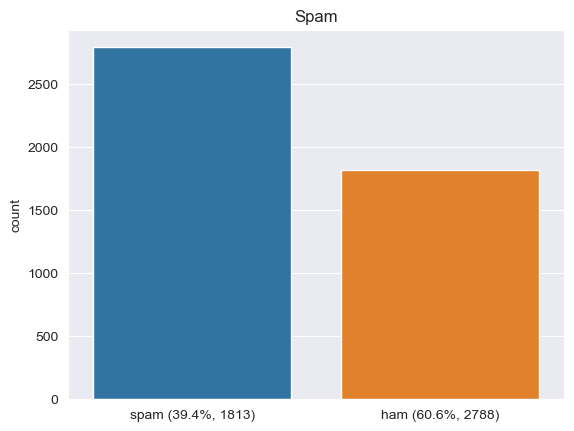

In [75]:
# visualizing the target column
vis_spam = df.loc[:,"spam"].values
total_count = len(vis_spam)
spam_count = sum(vis_spam)
ham_count = total_count - spam_count

# calculating percentage of each class
spam_percent = (spam_count / total_count) * 100
ham_percent = (ham_count / total_count) * 100

# plotting the countplot with percentages
target_plot = sns.countplot(x=vis_spam)
target_plot.set_xticklabels(["spam ({:.1f}%, {})".format(spam_percent, spam_count), "ham ({:.1f}%, {})".format(ham_percent, ham_count)])

plt.title("Spam")
plt.show()

The target column has a data imbalance which will be addressed

In [76]:
# correlation analysis to identify the top features

# calculate the Pearson correlation coefficients between each feature and the target variable
corr = np.abs(df.corr()['spam'])

# print the top 20 features with the highest correlation coefficients
top_features = corr.sort_values(ascending=False)[:20]
print(top_features)

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_hp                  0.256723
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_hpl                 0.232968
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
Name: spam, dtype: float64


IndexError: index 12 is out of bounds for axis 0 with size 12

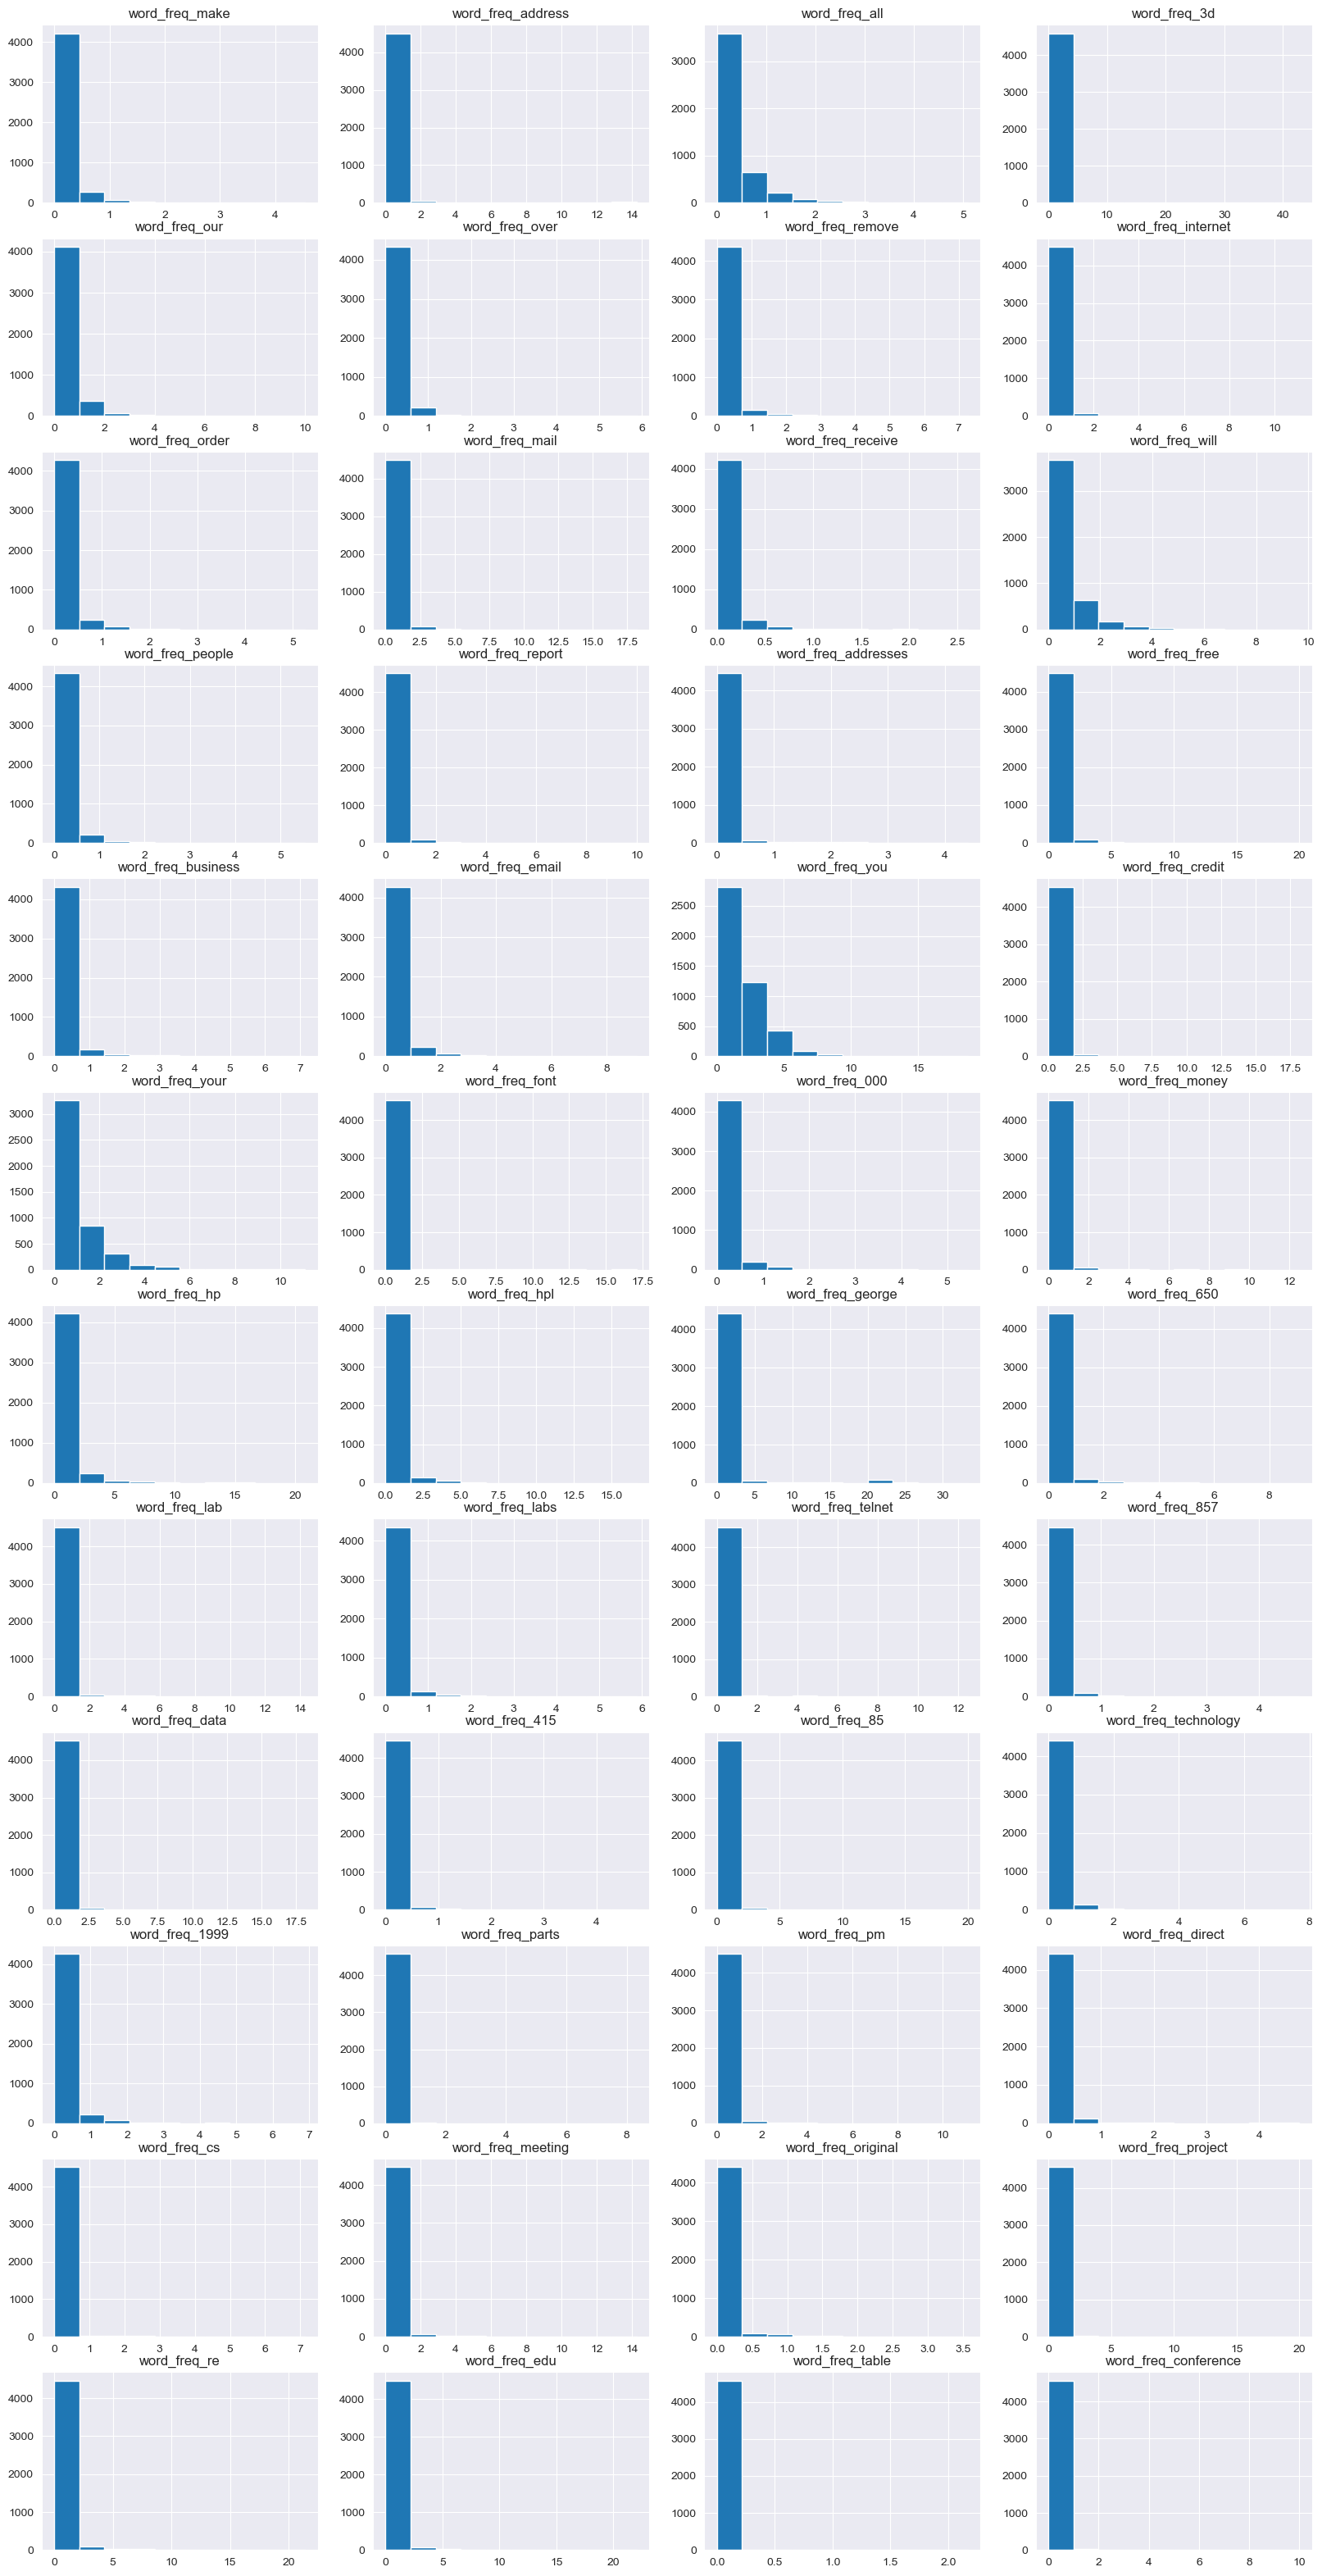

In [77]:
# plot histograms of the numerical attributes to analyze the distribution of the numerical features
num_cols = df.columns[:-1] # select all columns except the last one (spam)
fig, axs = plt.subplots(12, 4, figsize=(20, 40))
for i, col in enumerate(num_cols):
    axs[i//4][i%4].hist(df[col])
    axs[i//4][i%4].set_title(col)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [47]:
# removal of duplicated values
df_copy = df.copy()
df = df.drop_duplicates()
print(f"Number of duplicates dropped: {df_copy.shape[0] - df.shape[0]}")

Number of duplicates dropped: 391


In [48]:
# check for null values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

no null values found in the dataset

In [49]:
#TODO: checking for outliers


## Fixing data imbalance

In [50]:
# make x the orig df without target column and y the values of the target column
x = df.drop(["spam"], axis=1)
y = df.loc[:, "spam"].values

In [51]:
# correct data imbalances by using SMOTE technique to duplicate values and fit_resample to resample minority classes.
sm = SMOTE(random_state = 39)
print("Original Dataset Shape %s" % Counter(y))
x, y = sm.fit_resample(x, y)
print("Resampled Dataset Shape %s" % Counter(y))

Original Dataset Shape Counter({0: 2531, 1: 1679})
Resampled Dataset Shape Counter({1: 2531, 0: 2531})


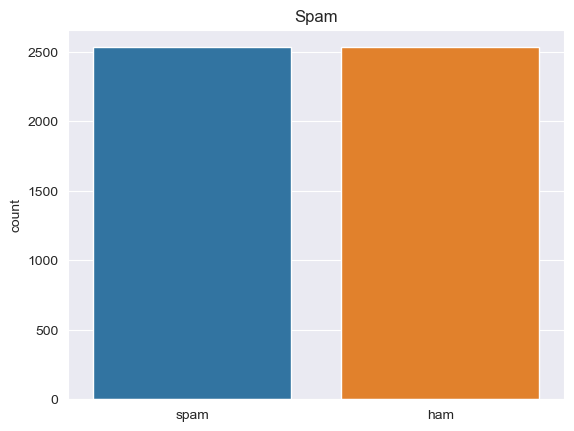

In [52]:
# plot of classes after resampling.
target_plot = sns.countplot(x=y)
target_plot.set_xticklabels(["spam", "ham"])

plt.title("Spam")
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

## Data Split

In [54]:
# test/training data split
X = df.drop("spam",axis=1)
Y = df["spam"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=8)
print(f"Original Dataset: ({X.shape}, {Y.shape}) \nTraining Dataset: ({x_train.shape}, {y_train.shape}) \nTesting Dataset: ({x_test.shape}, {y_test.shape})")

Original Dataset: ((4210, 57), (4210,)) 
Training Dataset: ((3157, 57), (3157,)) 
Testing Dataset: ((1053, 57), (1053,))


## Data Standardization

In [55]:
# perform feature scaling on the training & testing data to standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Feature Selection

Here I tried using multiple feature selection methods and determined the best approach to go with based on the best evaluation metrics given after running each separately.

In [56]:
# uni-variate feature selection
# selector = SelectKBest(chi2, k=25)
# X_new = selector.fit_transform(X, Y)
# selected_features = X.columns[selector.get_support(indices=True)]
# print(selected_features)

# df = df.loc[:, selected_features]

In [57]:
# recursive feature selection
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=25, step=1)
selector.fit(X,Y)
# Get the selected feature indices
selected_features = X.columns[selector.support_]

# Print the selected feature names
print(selected_features)
df = df.loc[:, selected_features]

Index(['word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_your', 'word_freq_money', 'word_freq_hp', 'word_freq_george',
       'word_freq_650', 'word_freq_technology', 'word_freq_meeting',
       'word_freq_re', 'word_freq_edu', 'char_freq_(', 'char_freq_!',
       'char_freq_$', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total'],
      dtype='object')


In [58]:
df.head()

,word_freq_our,word_freq_over,word_freq_remove,word_freq_mail,word_freq_receive,word_freq_will,word_freq_free,word_freq_business,word_freq_email,word_freq_you,...,word_freq_technology,word_freq_meeting,word_freq_re,word_freq_edu,char_freq_(,char_freq_!,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.32,0.00,0.00,0.00,0.00,0.64,0.32,0.00,1.29,1.93,...,0.0,0.0,0.00,0.00,0.000,0.778,0.000,3.756,61,278
1,0.14,0.28,0.21,0.94,0.21,0.79,0.14,0.07,0.28,3.47,...,0.0,0.0,0.00,0.00,0.132,0.372,0.180,5.114,101,1028
2,1.23,0.19,0.19,0.25,0.38,0.45,0.06,0.06,1.03,1.36,...,0.0,0.0,0.06,0.06,0.143,0.276,0.184,9.821,485,2259
3,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,3.18,...,0.0,0.0,0.00,0.00,0.137,0.137,0.000,3.537,40,191
4,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,3.18,...,0.0,0.0,0.00,0.00,0.135,0.135,0.000,3.537,40,191


# Modelling

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score


# creating a function to print the evaluation of a model
def evaluate(pred, pred_prob):
    print(f"Accuracy: {accuracy_score(y_test, pred)}\n")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")
    print(f"Classification Report: \n{classification_report(y_test, pred)}\n")
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    auc = roc_auc_score(y_test, pred_prob)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## K Nearest Neighbor (KNN)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [61]:
knn_pred = knn.predict(x_test)
knn_pred_prob = knn.predict_proba(x_test)[:, 1]

C:\Users\misha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8755935422602089

Confusion Matrix: 
[[577  38]
 [ 93 345]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       615
           1       0.90      0.79      0.84       438

    accuracy                           0.88      1053
   macro avg       0.88      0.86      0.87      1053
weighted avg       0.88      0.88      0.87      1053




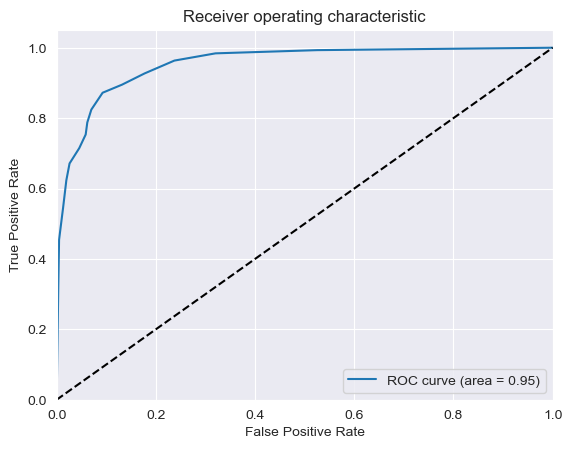

In [62]:
evaluate(knn_pred, knn_pred_prob)

## Decision Tree

In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
dt_pred = dt.predict(x_test)
dt_pred_prob = dt.predict_proba(x_test)[:, 1]

Accuracy: 0.9012345679012346

Confusion Matrix: 
[[565  50]
 [ 54 384]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       615
           1       0.88      0.88      0.88       438

    accuracy                           0.90      1053
   macro avg       0.90      0.90      0.90      1053
weighted avg       0.90      0.90      0.90      1053




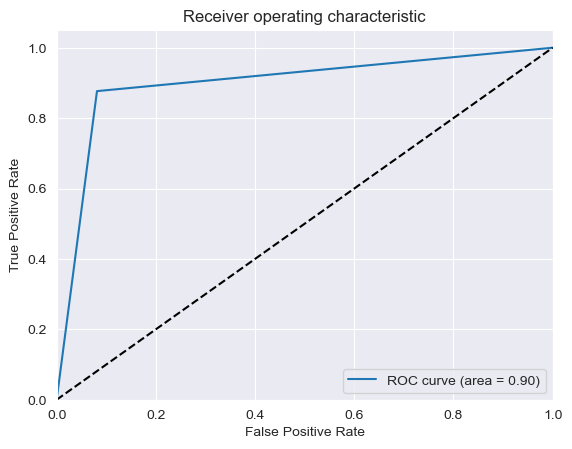

In [65]:
evaluate(dt_pred, dt_pred_prob)

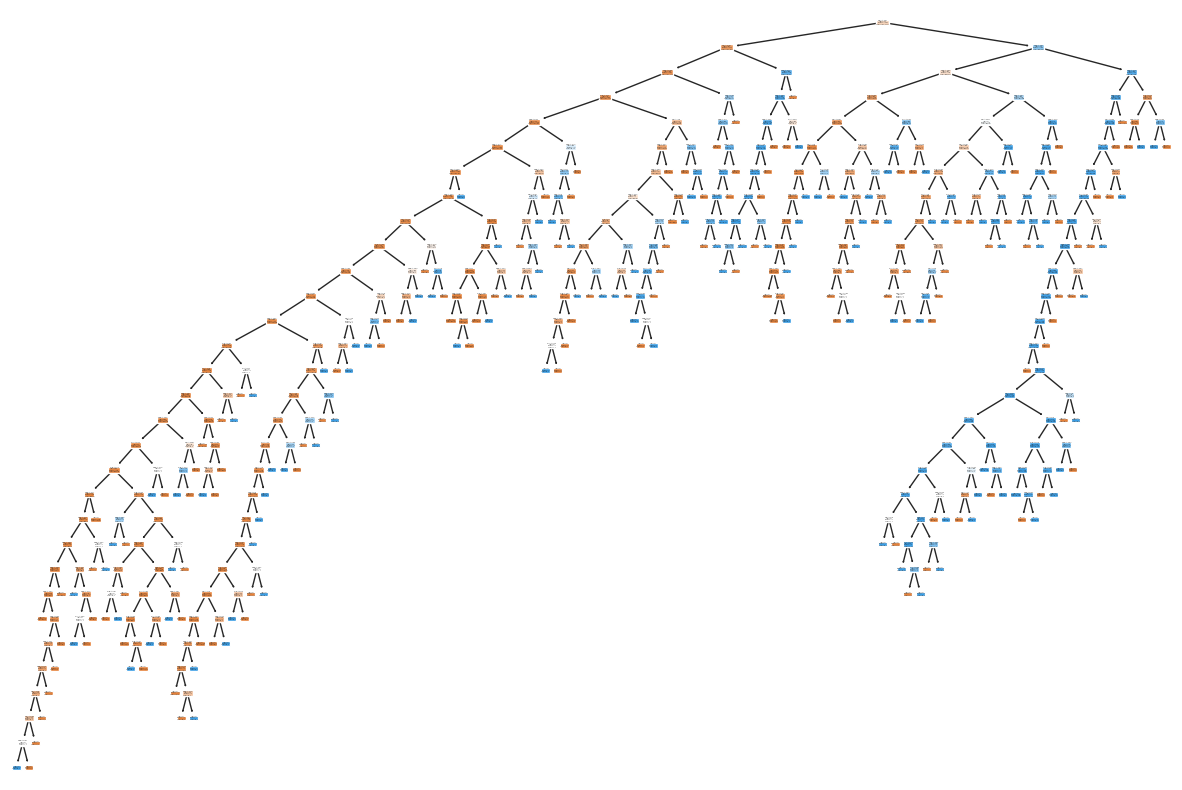

In [66]:
# visualizing the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()